In [1]:
import pandas as pd
import numpy as np

# Import data

In [3]:
path = r'C:\Users\panka\Downloads\C5 Input for participants\C5 Input for participants\domestic_visitors'

In [4]:
import os

In [11]:
o = os.listdir(path)
o

['domestic_visitors_2016.csv',
 'domestic_visitors_2017.csv',
 'domestic_visitors_2018.csv',
 'domestic_visitors_2019.csv']

In [10]:
o[0]

'domestic_visitors_2016.csv'

In [22]:
d16 = pd.read_csv(path+'/'+o[0])
d17 = pd.read_csv(path+'/'+o[1])
d18 = pd.read_csv(path+'/'+o[2])
d19 = pd.read_csv(path+'/'+o[3])

In [32]:
domestic = pd.concat([d16,d17,d18,d19], ignore_index=True)

In [34]:
domestic.shape

(1512, 5)

In [37]:
domestic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1482 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


In [38]:
domestic.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887


In [39]:
path2 = r'C:\Users\panka\Downloads\C5 Input for participants\C5 Input for participants\foreign_visitors'

In [40]:
p = os.listdir(path2)
p

['foreign_visitors_2016.csv',
 'foreign_visitors_2017.csv',
 'foreign_visitors_2018.csv',
 'foreign_visitors_2019.csv']

In [42]:
f16 = pd.read_csv(path2+'/'+p[0])
f17 = pd.read_csv(path2+'/'+p[1])
f18 = pd.read_csv(path2+'/'+p[2])
f19 = pd.read_csv(path2+'/'+p[3])

In [44]:
foreign = pd.concat([f16,f17,f18,f19], ignore_index=True)

In [45]:
foreign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


# Top 10 districs of total domestic visitors 

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [156]:
domestic = domestic[domestic['visitors'] != ' ']

In [158]:
domestic['visitors'] = pd.to_numeric(domestic['visitors'])

C:\Users\panka\AppData\Local\Temp\ipykernel_668\963427157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic['visitors'] = pd.to_numeric(domestic['visitors'])


In [165]:
domestic['year'] = domestic['year'].astype(str)

C:\Users\panka\AppData\Local\Temp\ipykernel_668\1684198024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic['year'] = domestic['year'].astype(str)


In [166]:
domestic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1197 non-null   object
 1   date      1197 non-null   object
 2   month     1197 non-null   object
 3   year      1197 non-null   object
 4   visitors  1197 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 56.1+ KB


In [505]:
dom_visits_by_dis = domestic.groupby('district').sum('visitors')
top10dom =dom_visits_by_dis.sort_values(by='visitors', ascending=False).head(10)
top10dom

,visitors
district,
Hyderabad,83900960
Rajanna Sircilla,41763276
Warangal (Urban),30726603
Yadadri Bhongir,26893080
Bhadradri Kothagudem,21600962
Medak,20542639
Jayashankar Bhoopalpally,19632865
Mahbubnagar,17180118
Nirmal,13315796


<AxesSubplot:xlabel='district'>

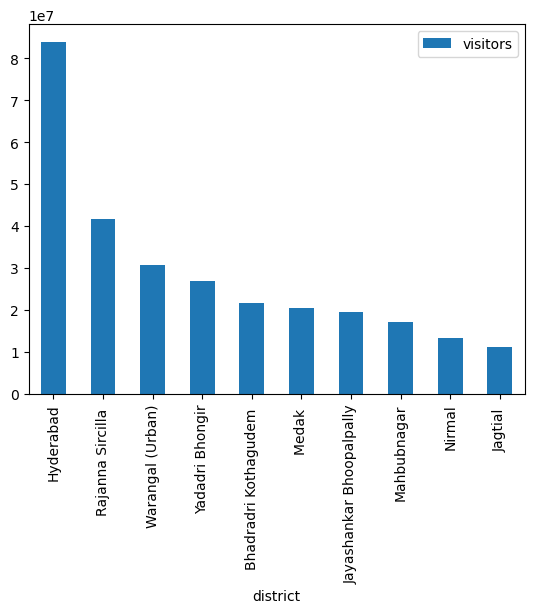

In [510]:
top10dom.plot(kind='bar')

# TOP 3 districts based on compounded annual growth rate (CAGR)

In [80]:
# combine domestic & foreign data to get the total visitors

In [169]:
domestic.fillna(0,inplace=True)

C:\Users\panka\AppData\Local\Temp\ipykernel_668\344655951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domestic.fillna(0,inplace=True)


In [170]:
domestic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1197 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1197 non-null   object
 1   date      1197 non-null   object
 2   month     1197 non-null   object
 3   year      1197 non-null   object
 4   visitors  1197 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 56.1+ KB


In [171]:
foreign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1512 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


In [172]:
domestic.head(20)

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
5,Adilabad,01-06-2016,June,2016,368237
6,Adilabad,01-07-2016,July,2016,447562
7,Adilabad,01-08-2016,August,2016,614285
8,Adilabad,01-09-2016,September,2016,491279
9,Adilabad,01-10-2016,October,2016,94184


In [99]:
foreign.head()

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,2
1,Adilabad,01-02-2016,February,2016,0
2,Adilabad,01-03-2016,March,2016,2
3,Adilabad,01-04-2016,April,2016,0
4,Adilabad,01-05-2016,May,2016,0


In [122]:
df = pd.merge(domestic,foreign, on = ['district','date','month','year'], suffixes=('_d','_f'))
df.head(20)

,district,date,month,year,visitors_d,visitors_f
0,Adilabad,01-01-2016,January,2016,792136,2
1,Adilabad,01-02-2016,February,2016,937820,0
2,Adilabad,01-03-2016,March,2016,582946,2
3,Adilabad,01-04-2016,April,2016,341948,0
4,Adilabad,01-05-2016,May,2016,252887,0
5,Adilabad,01-06-2016,June,2016,368237,0
6,Adilabad,01-07-2016,July,2016,447562,4
7,Adilabad,01-08-2016,August,2016,614285,2
8,Adilabad,01-09-2016,September,2016,491279,0
9,Adilabad,01-10-2016,October,2016,94184,0


In [199]:
final = df[(df['visitors_d'] != ' ') & (df['visitors_f'] != ' ')]
final

,district,date,month,year,visitors_d,visitors_f
0,Adilabad,01-01-2016,January,2016,792136,2
1,Adilabad,01-02-2016,February,2016,937820,0
2,Adilabad,01-03-2016,March,2016,582946,2
3,Adilabad,01-04-2016,April,2016,341948,0
4,Adilabad,01-05-2016,May,2016,252887,0
...,...,...,...,...,...,...
1495,Yadadri Bhongir,01-08-2019,August,2019,389010,0
1496,Yadadri Bhongir,01-09-2019,September,2019,366862,0
1497,Yadadri Bhongir,01-10-2019,October,2019,381860,0
1498,Yadadri Bhongir,01-11-2019,November,2019,365990,0


In [200]:
final['visitors_d'] = pd.to_numeric(final['visitors_d'])
final['visitors_f'] = pd.to_numeric(final['visitors_f'])

C:\Users\panka\AppData\Local\Temp\ipykernel_668\925012820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['visitors_d'] = pd.to_numeric(final['visitors_d'])
C:\Users\panka\AppData\Local\Temp\ipykernel_668\925012820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['visitors_f'] = pd.to_numeric(final['visitors_f'])


In [201]:
final['visitors_total'] = final['visitors_d'] + final['visitors_f']

C:\Users\panka\AppData\Local\Temp\ipykernel_668\1524882260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['visitors_total'] = final['visitors_d'] + final['visitors_f']


In [198]:
#final['year'] = final['year'].astype(str)

C:\Users\panka\AppData\Local\Temp\ipykernel_668\1928002333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['year'] = final['year'].astype(str)


In [193]:
#final['year']=pd.to_datetime(final.year, format='%Y-%m-%d')

C:\Users\panka\AppData\Local\Temp\ipykernel_668\1048593978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['year']=pd.to_datetime(final.year, format='%Y-%m-%d')


In [218]:
new= final.groupby(['district','year']).sum()
news = new.filter(items=['visitors_total'])
news

visitors_total
district              year                
Adilabad              2016         5075567
                      2017          825391
                      2018          644748
                      2019          775901
Bhadradri Kothagudem  2016          889030
...                                    ...
Warangal (Urban)      2019         1797680
Yadadri Bhongir       2016         1728600
                      2017         7001728
                      2018        13673378
                      2019         4489374

[113 rows x 1 columns]

In [217]:
#CAGR per year
cagr_period = 1
news["cagr"] = news.groupby("district").apply(lambda x, period: ((x.pct_change(period) + 1) ** (1/period)) - 1, cagr_period)
print(news)

                            visitors_total      cagr
district              year                          
Adilabad              2016         5075567       NaN
                      2017          825391 -0.837380
                      2018          644748 -0.218857
                      2019          775901  0.203417
Bhadradri Kothagudem  2016          889030       NaN
...                                    ...       ...
Warangal (Urban)      2019         1797680  0.042026
Yadadri Bhongir       2016         1728600       NaN
                      2017         7001728  3.050519
                      2018        13673378  0.952858
                      2019         4489374 -0.671670

[113 rows x 2 columns]


In [219]:
#CAGR by 3 yrs
cagr_period = 3
news["cagr"] = news.groupby("district").apply(lambda x, period: ((x.pct_change(period) + 1) ** (1/period)) - 1, cagr_period)
print(news)

                            visitors_total      cagr
district              year                          
Adilabad              2016         5075567       NaN
                      2017          825391       NaN
                      2018          644748       NaN
                      2019          775901 -0.465304
Bhadradri Kothagudem  2016          889030       NaN
...                                    ...       ...
Warangal (Urban)      2019         1797680 -0.588452
Yadadri Bhongir       2016         1728600       NaN
                      2017         7001728       NaN
                      2018        13673378       NaN
                      2019         4489374  0.374560

[113 rows x 2 columns]


In [222]:
# Bottom 3 districts CAGR between 2016 to 2019
news.sort_values(by='cagr').head(3)

,,visitors_total,cagr
district,year,,
Karimnagar,2019,77491,-0.796296
Nalgonda,2019,140918,-0.711335
Warangal (Urban),2019,1797680,-0.588452


# Peak & Low Season months

In [227]:
final['date'] = pd.to_datetime(final['date'])

C:\Users\panka\AppData\Local\Temp\ipykernel_668\3252197967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['date'] = pd.to_datetime(final['date'])


In [236]:
hyde = final[final['district']=='Hyderabad']
hyde.head()

,district,date,month,year,visitors_d,visitors_f,visitors_total
24,Hyderabad,2016-01-01,January,2016,1122510,15865,1138375
25,Hyderabad,2016-01-02,February,2016,778748,29646,808394
26,Hyderabad,2016-01-03,March,2016,1017794,13019,1030813
27,Hyderabad,2016-01-04,April,2016,1127738,8402,1136140
28,Hyderabad,2016-01-05,May,2016,1287181,8522,1295703


In [254]:
hyde_by_month = hyde.groupby('month').sum().sort_values(by='visitors_total')
hyde_by_month

,year,visitors_d,visitors_f,visitors_total
month,,,,
February,8070,5014430,103778,5118208
March,8070,5227626,76358,5303984
September,8070,5312283,94080,5406363
July,8070,5552527,80616,5633143
November,8070,5626156,93503,5719659
August,8070,5750967,83769,5834736
May,8070,6049214,60376,6109590
April,8070,6126839,60495,6187334
January,8070,6452101,106450,6558551


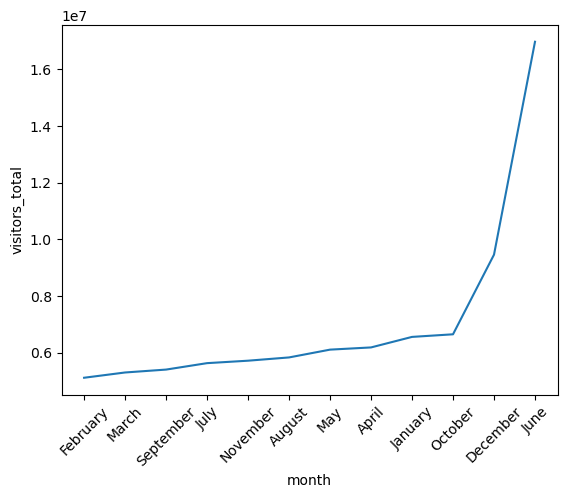

In [255]:
sns.lineplot(data=hyde_by_month,x='month',y='visitors_total')
plt.xticks(rotation=45)
plt.show()

# Peak--June, Dec, Oct
# Low --Feb, Mar, Sep, July

# Top & Bottom 3 districts of foreign/domestic ratio

In [257]:
final['fd_ratio'] = final['visitors_f']/final['visitors_d']

C:\Users\panka\AppData\Local\Temp\ipykernel_668\3702131795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['fd_ratio'] = final['visitors_f']/final['visitors_d']


In [271]:
final.head()

,district,date,month,year,visitors_d,visitors_f,visitors_total,fd_ratio
0,Adilabad,2016-01-01,January,2016,792136,2,792138,0.000003
1,Adilabad,2016-01-02,February,2016,937820,0,937820,0.000000
2,Adilabad,2016-01-03,March,2016,582946,2,582948,0.000003
3,Adilabad,2016-01-04,April,2016,341948,0,341948,0.000000
4,Adilabad,2016-01-05,May,2016,252887,0,252887,0.000000


In [268]:
fs = final.groupby('district').sum()

In [518]:
fs['fd_ratio'] = fs['visitors_f']/fs['visitors_d']
foreign_dom_ratio = fs.sort_values(by='fd_ratio', ascending=False)
foreign_dom_ratio

,district,year,visitors_d,visitors_f,visitors_total,fd_ratio
2,Hyderabad,96840,83900960,1044898,84945858,1.245395e-02
26,Warangal (Rural),78696,819162,306,819468,3.735525e-04
15,Mulugu,24228,1819800,575,1820375,3.159688e-04
27,Warangal (Urban),96840,30726603,8821,30735424,2.870802e-04
6,Jogulamba Gadwal,78696,6813340,945,6814285,1.386985e-04
12,Mahbubnagar,96840,17180118,2282,17182400,1.328280e-04
16,Nagarkurnool,78696,7424355,761,7425116,1.025005e-04
5,Jayashankar Bhoopalpally,78696,19632865,1252,19634117,6.377062e-05
19,Nizamabad,96840,116147,5,116152,4.304889e-05
13,Mancherial,76679,865123,10,865133,1.155905e-05


<AxesSubplot:xlabel='district'>

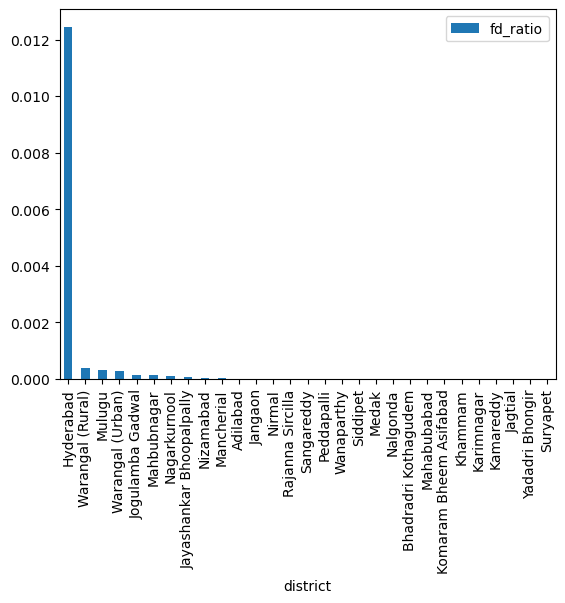

In [521]:
foreign_dom_ratio.plot(kind='bar',y='fd_ratio',x='district')

# Get data & create dataframe

In [274]:
fs.index

Index(['Adilabad', 'Bhadradri Kothagudem ', 'Hyderabad', 'Jagtial ',
       'Jangaon ', 'Jayashankar Bhoopalpally', 'Jogulamba Gadwal ',
       'Kamareddy ', 'Karimnagar ', 'Khammam', 'Komaram Bheem Asifabad',
       'Mahabubabad ', 'Mahbubnagar', 'Mancherial', 'Medak ', 'Mulugu',
       'Nagarkurnool ', 'Nalgonda', 'Nirmal', 'Nizamabad', 'Peddapalli',
       'Rajanna Sircilla ', 'Sangareddy ', 'Siddipet', 'Suryapet',
       'Wanaparthy ', 'Warangal (Rural)', 'Warangal (Urban)',
       'Yadadri Bhongir'],
      dtype='object', name='district')

In [279]:
d= pd.Series(['Mulugu',
'Kumuram Bheem',
'Nagarkurnool',
'Jayashankar',
'Bhadradri Kothagudem',
'Adilabad',
'Nirmal',
'Mancherial',
'Mahabubabad',
'Nalgonda',
'Yadadri Bhuvanagiri',
'Jogulamba Gadwal',
'Narayanpet',
'Jangaon',
'Vikarabad',
'Kamareddy',
'Wanaparthy',
'Medak',
'Siddipet',
'Rajanna Sircilla',
'Suryapet',
'Khammam',
'Mahabubnagar',
'Sangareddy',
'Jagtial',
'Peddapalli',
'Nizamabad',
'Warangal (Rural)',
'Warangal (Urban)',
'Karimnagar',
'Rangareddy',
'Hanumakonda',
'Medchal-Malkajgiri',
'Hyderabad'])
dis = pd.DataFrame(d)

In [281]:
pop = pd.Series([294671,
515812,
861766,
416763,
1069261,
708972,
709418,
807037,
774549,
1618416,
770833,
609990,
566874,
534991,
941383,
972625,
577758,
767428,
1012065,
552037,
1099560,
1401639,
905660,
1527628,
985417,
795332,
1571022,
510057,
227091,
1005711,
2426243,
1062247,
2460095,
3943323])

In [283]:
dis['population'] = pop

In [286]:
dis.columns = ['district', 'population']

In [287]:
dis

,district,population
0,Mulugu,294671
1,Kumuram Bheem,515812
2,Nagarkurnool,861766
3,Jayashankar,416763
4,Bhadradri Kothagudem,1069261
5,Adilabad,708972
6,Nirmal,709418
7,Mancherial,807037
8,Mahabubabad,774549
9,Nalgonda,1618416


In [291]:
fs.reset_index(inplace=True)

In [304]:
fs.replace('	','',regex=True,inplace=True)
fs['district'] = fs['district'].apply(lambda x: x.strip())
fs

,district,year,visitors_d,visitors_f,visitors_total,fd_ratio
0,Adilabad,96840,7321575,32,7321607,4.370644e-06
1,Bhadradri Kothagudem,78696,21600962,0,21600962,0.000000e+00
2,Hyderabad,96840,83900960,1044898,84945858,1.245395e-02
3,Jagtial,78696,11303514,0,11303514,0.000000e+00
4,Jangaon,78696,826280,2,826282,2.420487e-06
5,Jayashankar Bhoopalpally,78696,19632865,1252,19634117,6.377062e-05
6,Jogulamba Gadwal,78696,6813340,945,6814285,1.386985e-04
7,Kamareddy,74660,1678,0,1678,0.000000e+00
8,Karimnagar,96840,9462383,0,9462383,0.000000e+00
9,Khammam,96840,9378315,0,9378315,0.000000e+00


In [305]:
df_pop= pd.merge(fs,dis, on = 'district', how='outer')

In [306]:
df_pop

,district,year,visitors_d,visitors_f,visitors_total,fd_ratio,population
0,Adilabad,96840.0,7321575.0,32.0,7321607.0,4.370644e-06,708972.0
1,Bhadradri Kothagudem,78696.0,21600962.0,0.0,21600962.0,0.000000e+00,1069261.0
2,Hyderabad,96840.0,83900960.0,1044898.0,84945858.0,1.245395e-02,3943323.0
3,Jagtial,78696.0,11303514.0,0.0,11303514.0,0.000000e+00,985417.0
4,Jangaon,78696.0,826280.0,2.0,826282.0,2.420487e-06,534991.0
5,Jayashankar Bhoopalpally,78696.0,19632865.0,1252.0,19634117.0,6.377062e-05,NaN
6,Jogulamba Gadwal,78696.0,6813340.0,945.0,6814285.0,1.386985e-04,609990.0
7,Kamareddy,74660.0,1678.0,0.0,1678.0,0.000000e+00,972625.0
8,Karimnagar,96840.0,9462383.0,0.0,9462383.0,0.000000e+00,1005711.0
9,Khammam,96840.0,9378315.0,0.0,9378315.0,0.000000e+00,1401639.0


In [325]:
df_pop.loc[5]['population'] = 416763.0
df_pop.loc[10]['population'] = 515812.0
df_pop.loc[12]['population'] = 905660.0
df_pop.loc[28]['population'] = 770833.0

C:\Users\panka\AppData\Local\Temp\ipykernel_668\2598866034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop.loc[5]['population'] = 416763.0
C:\Users\panka\AppData\Local\Temp\ipykernel_668\2598866034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop.loc[10]['population'] = 515812.0
C:\Users\panka\AppData\Local\Temp\ipykernel_668\2598866034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop.loc[12]['population'

In [331]:
pd.options.mode.chained_assignment = None

In [336]:
df_pop2 = df_pop.loc[:]['population'].copy(deep=True)

In [341]:
df_pop2[5] = 416763.0
df_pop2[10] = 515812.0
df_pop2[12] = 905660.0
df_pop2[28] = 770833.0

In [342]:
df_pop2

0      708972.0
1     1069261.0
2     3943323.0
3      985417.0
4      534991.0
5      416763.0
6      609990.0
7      972625.0
8     1005711.0
9     1401639.0
10     515812.0
11     774549.0
12     905660.0
13     807037.0
14     767428.0
15     294671.0
16     861766.0
17    1618416.0
18     709418.0
19    1571022.0
20     795332.0
21     552037.0
22    1527628.0
23    1012065.0
24    1099560.0
25     577758.0
26     510057.0
27     227091.0
28     770833.0
29     515812.0
30     416763.0
31     770833.0
32     566874.0
33     941383.0
34     905660.0
35    2426243.0
36    1062247.0
37    2460095.0
Name: population, dtype: float64

In [344]:
df_pop['population'] = df_pop2

In [347]:
df_pop.dropna(inplace=True)

In [348]:
df_pop

,district,year,visitors_d,visitors_f,visitors_total,fd_ratio,population
0,Adilabad,96840.0,7321575.0,32.0,7321607.0,4.370644e-06,708972.0
1,Bhadradri Kothagudem,78696.0,21600962.0,0.0,21600962.0,0.000000e+00,1069261.0
2,Hyderabad,96840.0,83900960.0,1044898.0,84945858.0,1.245395e-02,3943323.0
3,Jagtial,78696.0,11303514.0,0.0,11303514.0,0.000000e+00,985417.0
4,Jangaon,78696.0,826280.0,2.0,826282.0,2.420487e-06,534991.0
5,Jayashankar Bhoopalpally,78696.0,19632865.0,1252.0,19634117.0,6.377062e-05,416763.0
6,Jogulamba Gadwal,78696.0,6813340.0,945.0,6814285.0,1.386985e-04,609990.0
7,Kamareddy,74660.0,1678.0,0.0,1678.0,0.000000e+00,972625.0
8,Karimnagar,96840.0,9462383.0,0.0,9462383.0,0.000000e+00,1005711.0
9,Khammam,96840.0,9378315.0,0.0,9378315.0,0.000000e+00,1401639.0


In [349]:
df_pop['visitorsPop_ratio'] = df_pop['visitors_total']/df_pop['population']

In [352]:
#Top 5 district with best Visitors/Population ratio
df_pop.sort_values(by='visitorsPop_ratio', ascending=False).head(5)

,district,year,visitors_d,visitors_f,visitors_total,fd_ratio,population,visitorsPop_ratio
27,Warangal (Urban),96840.0,30726603.0,8821.0,30735424.0,0.000287,227091.0,135.344087
21,Rajanna Sircilla,78696.0,41763276.0,0.0,41763276.0,0.000000,552037.0,75.653038
5,Jayashankar Bhoopalpally,78696.0,19632865.0,1252.0,19634117.0,0.000064,416763.0,47.110989
28,Yadadri Bhongir,78696.0,26893080.0,0.0,26893080.0,0.000000,770833.0,34.888335
14,Medak,96840.0,20542639.0,0.0,20542639.0,0.000000,767428.0,26.768165


In [353]:
#Bottom 5 district with best Visitors/Population ratio
df_pop.sort_values(by='visitorsPop_ratio', ascending=True).head(5)

,district,year,visitors_d,visitors_f,visitors_total,fd_ratio,population,visitorsPop_ratio
7,Kamareddy,74660.0,1678.0,0.0,1678.0,0.000000,972625.0,0.001725
20,Peddapalli,78696.0,56977.0,0.0,56977.0,0.000000,795332.0,0.071639
19,Nizamabad,96840.0,116147.0,5.0,116152.0,0.000043,1571022.0,0.073934
10,Komaram Bheem Asifabad,76679.0,88938.0,0.0,88938.0,0.000000,515812.0,0.172423
11,Mahabubabad,78696.0,600697.0,0.0,600697.0,0.000000,774549.0,0.775544


<AxesSubplot:xlabel='district'>

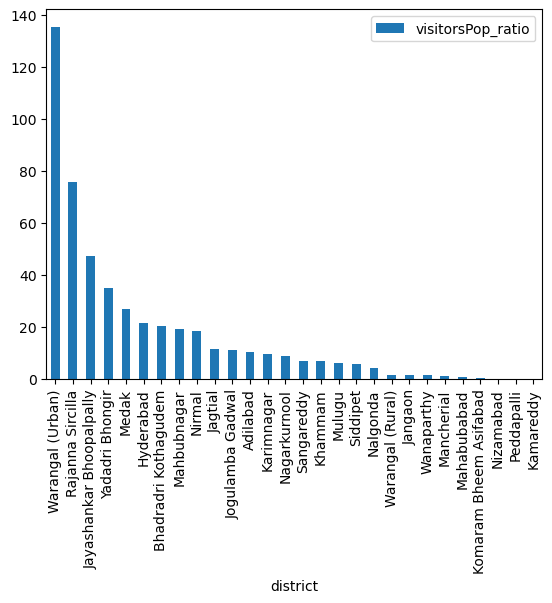

In [531]:
df_pop.sort_values(by='visitorsPop_ratio', ascending=False).plot(kind='bar',x='district',y='visitorsPop_ratio')

# Projected domestic & foreign tourists in Hyderabad

In [370]:
Hyde_yr = final[final['district']=='Hyderabad'].groupby('year').sum()

In [381]:
Hyde_yr

,visitors_d,visitors_f,visitors_total,fd_ratio
year,,,,
2016,23394705,163631,23558336,0.156396
2017,27160242,247179,27407421,0.111628
2018,19543651,314788,19858439,0.195555
2019,13802362,319300,14121662,0.281069


In [383]:
Hyde_yr['d_grow'] = Hyde_yr['visitors_d'].pct_change()
Hyde_yr['f_grow'] = Hyde_yr['visitors_f'].pct_change()

In [384]:
Hyde_yr

,visitors_d,visitors_f,visitors_total,fd_ratio,d_grow,f_grow
year,,,,,,
2016,23394705,163631,23558336,0.156396,NaN,NaN
2017,27160242,247179,27407421,0.111628,0.160957,0.510588
2018,19543651,314788,19858439,0.195555,-0.280432,0.273522
2019,13802362,319300,14121662,0.281069,-0.293767,0.014333


In [388]:
Hyde_yr.describe()

,visitors_d,visitors_f,visitors_total,fd_ratio,d_grow,f_grow
count,4.000000e+00,4.000000,4.000000e+00,4.000000,3.000000,3.000000
mean,2.097524e+07,261224.500000,2.123646e+07,0.186162,-0.137747,0.266148
std,5.704025e+06,72946.509044,5.656594e+06,0.071965,0.258771,0.248209
min,1.380236e+07,163631.000000,1.412166e+07,0.111628,-0.293767,0.014333
25%,1.810833e+07,226292.000000,1.842424e+07,0.145204,-0.287100,0.143928
50%,2.146918e+07,280983.500000,2.170839e+07,0.175976,-0.280432,0.273522
75%,2.433609e+07,315916.000000,2.452061e+07,0.216934,-0.059737,0.392055
max,2.716024e+07,319300.000000,2.740742e+07,0.281069,0.160957,0.510588


In [390]:
# let's assume the avg growth rate will be the same till 2025
vd_2025 = 13802362 * (1-0.137747) ** (2025-2019)
vf_2025 = 319300 * (1+0.266148) **(2025-2019)
print(vd_2025)
print(vf_2025)

5672332.730959021
1315545.1518618776


In [391]:
# Projected revenue for 2025:
foreign_rev = 5600 * vf_2025
domestic_rev = 1200 * vd_2025

In [392]:
print(foreign_rev) 
print(domestic_rev)

7367052850.426515
6806799277.150825


# Recommendations for local tourism to gov 

In [400]:
#Get the growth rate per year for each district & compare the avg growth
news['growth'] = news.groupby('district')['visitors_total'].pct_change()

In [536]:
news

visitors_total      cagr    growth
district              year                                    
Adilabad              2016         5075567       NaN       NaN
                      2017          825391       NaN -0.837380
                      2018          644748       NaN -0.218857
                      2019          775901 -0.465304  0.203417
Bhadradri Kothagudem  2016          889030       NaN       NaN
...                                    ...       ...       ...
Warangal (Urban)      2019         1797680 -0.588452  0.042026
Yadadri Bhongir       2016         1728600       NaN       NaN
                      2017         7001728       NaN  3.050519
                      2018        13673378       NaN  0.952858
                      2019         4489374  0.374560 -0.671670

[113 rows x 3 columns]

<AxesSubplot:xlabel='district'>

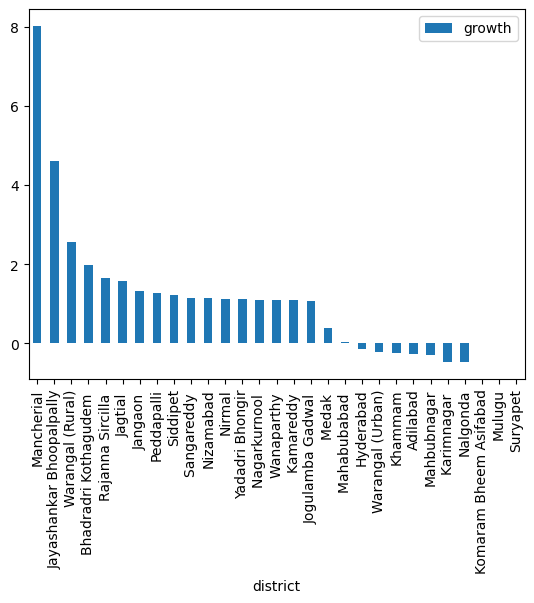

In [535]:
ngrow = news.groupby('district').mean().sort_values('growth', ascending=False)
ngrow.plot(kind='bar',y='growth')

In [414]:
# top 3 districts with most avg growth between 2016 & 2019--- Highest Potential
potential = news.groupby('district').mean().sort_values('growth', ascending=False).head(3)
potential

,visitors_total,cagr,growth
district,,,
Mancherial,216283.25,2.258037,8.022560
Jayashankar Bhoopalpally,4908529.25,0.396112,4.595533
Warangal (Rural),204867.00,1.631455,2.570354


In [415]:
potential.index

Index(['Mancherial', 'Jayashankar Bhoopalpally', 'Warangal (Rural)'], dtype='object', name='district')

In [418]:
pot = final[(final['district']=='Mancherial') | (final['district']=='Jayashankar Bhoopalpally') | (final['district']=='Warangal (Rural)')]

In [425]:
pot.tail(20)

,district,date,month,year,visitors_d,visitors_f,visitors_total,fd_ratio
1276,Mancherial,2019-01-05,May,2019,26616,0,26616,0.000000
1277,Mancherial,2019-01-06,June,2019,24593,0,24593,0.000000
1278,Mancherial,2019-01-07,July,2019,22303,0,22303,0.000000
1279,Mancherial,2019-01-08,August,2019,21191,0,21191,0.000000
1280,Mancherial,2019-01-09,September,2019,24079,0,24079,0.000000
1281,Mancherial,2019-01-10,October,2019,20867,0,20867,0.000000
1282,Mancherial,2019-01-11,November,2019,29302,10,29312,0.000341
1283,Mancherial,2019-01-12,December,2019,16835,0,16835,0.000000
1464,Warangal (Rural),2019-01-01,January,2019,28700,0,28700,0.000000
1465,Warangal (Rural),2019-01-02,February,2019,28800,0,28800,0.000000


In [428]:
# find out which month in which these 3 districts has the most visitors: 
pot.groupby(['district','month']).mean().sort_values('visitors_total',ascending=False)

year    visitors_d  visitors_f  \
district                 month                                         
Jayashankar Bhoopalpally February   2018.0  2.918867e+06   32.666667   
                         January    2018.0  2.271280e+06   60.000000   
                         December   2017.5  2.749712e+05   35.250000   
                         September  2018.0  1.184667e+05   32.000000   
                         August     2018.0  1.160167e+05   26.666667   
                         November   2017.5  1.115950e+05   30.000000   
                         October    2017.5  1.082525e+05   29.750000   
                         June       2018.0  9.785000e+04   23.333333   
                         April      2018.0  9.278333e+04   27.000000   
                         May        2018.0  9.133333e+04   26.666667   
                         July       2018.0  8.958333e+04   27.333333   
                         March      2018.0  8.835000e+04   35.000000   
Mancherial               January    2018.0  3.110400e+04    0.000000   
                         June       2018.5  2.813000e+04    0.000000   
                         July       2018.0  2.794367e+04    0.000000   
                         August     2018.0  2.638533e+04    0.000000   
Warangal (Rural)         September  2018.0  2.406667e+04    8.666667   
Mancherial               September  2018.0  2.383900e+04    0.000000   
Warangal (Rural)         August     2018.0  2.365000e+04    9.333333   
Mancherial               October    2017.5  2.310050e+04    0.000000   
Warangal (Rural)         July       2018.0  2.270000e+04    8.333333   
Mancherial               February   2018.0  2.268467e+04    0.000000   
Warangal (Rural)         December   2017.5  2.211550e+04    8.000000   
                         February   2018.0  2.113333e+04    8.333333   
Mancherial               April      2018.0  2.100733e+04    0.000000   
Warangal (Rural)         March      2018.0  2.100000e+04    5.666667   
                         January    2018.0  2.063333e+04   11.666667   
Mancherial               November   2017.5  2.062275e+04    2.500000   
Warangal (Rural)         October    2017.5  2.045000e+04    6.250000   
Mancherial               December   2017.5  2.027050e+04    0.000000   
Warangal (Rural)         June       2018.0  1.973333e+04    8.000000   
                         November   2017.5  1.963750e+04    7.250000   
                         April      2018.0  1.870000e+04    6.333333   
                         May        2018.0  1.850000e+04    7.000000   
Mancherial               May        2018.0  1.807300e+04    0.000000   
                         March      2018.0  1.325900e+04    0.000000   

                                    visitors_total  fd_ratio  
district                 month                                
Jayashankar Bhoopalpally February     2.918899e+06  0.000133  
                         January      2.271340e+06  0.000372  
                         December     2.750065e+05  0.000182  
                         September    1.184987e+05  0.000235  
                         August       1.160433e+05  0.000190  
                         November     1.116250e+05  0.000242  
                         October      1.082822e+05  0.000249  
                         June         9.787333e+04  0.000198  
                         April        9.281033e+04  0.000233  
                         May          9.136000e+04  0.000234  
                         July         8.961067e+04  0.000252  
                         March        8.838500e+04  0.000303  
Mancherial               January      3.110400e+04  0.000000  
                         June         2.813000e+04  0.000000  
                         July         2.794367e+04  0.000000  
                         August       2.638533e+04  0.000000  
Warangal (Rural)         September    2.407533e+04  0.000628  
Mancherial               September    2.383900e+04  0.000000  
Warangal (Rural)         August       2.3

In [437]:
pot_bymonth = pot.groupby(['district','month']).mean()
pot_bymonth.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 36 entries, ('Jayashankar Bhoopalpally', 'April') to ('Warangal (Rural)', 'September')
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            36 non-null     float64
 1   visitors_d      36 non-null     float64
 2   visitors_f      36 non-null     float64
 3   visitors_total  36 non-null     float64
 4   fd_ratio        36 non-null     float64
dtypes: float64(5)
memory usage: 1.7+ KB


In [539]:
pot_bymonth

year    visitors_d  visitors_f  \
district                 month                                         
Jayashankar Bhoopalpally April      2018.0  9.278333e+04   27.000000   
                         August     2018.0  1.160167e+05   26.666667   
                         December   2017.5  2.749712e+05   35.250000   
                         February   2018.0  2.918867e+06   32.666667   
                         January    2018.0  2.271280e+06   60.000000   
                         July       2018.0  8.958333e+04   27.333333   
                         June       2018.0  9.785000e+04   23.333333   
                         March      2018.0  8.835000e+04   35.000000   
                         May        2018.0  9.133333e+04   26.666667   
                         November   2017.5  1.115950e+05   30.000000   
                         October    2017.5  1.082525e+05   29.750000   
                         September  2018.0  1.184667e+05   32.000000   
Mancherial               April      2018.0  2.100733e+04    0.000000   
                         August     2018.0  2.638533e+04    0.000000   
                         December   2017.5  2.027050e+04    0.000000   
                         February   2018.0  2.268467e+04    0.000000   
                         January    2018.0  3.110400e+04    0.000000   
                         July       2018.0  2.794367e+04    0.000000   
                         June       2018.5  2.813000e+04    0.000000   
                         March      2018.0  1.325900e+04    0.000000   
                         May        2018.0  1.807300e+04    0.000000   
                         November   2017.5  2.062275e+04    2.500000   
                         October    2017.5  2.310050e+04    0.000000   
                         September  2018.0  2.383900e+04    0.000000   
Warangal (Rural)         April      2018.0  1.870000e+04    6.333333   
                         August     2018.0  2.365000e+04    9.333333   
                         December   2017.5  2.211550e+04    8.000000   
                         February   2018.0  2.113333e+04    8.333333   
                         January    2018.0  2.063333e+04   11.666667   
                         July       2018.0  2.270000e+04    8.333333   
                         June       2018.0  1.973333e+04    8.000000   
                         March      2018.0  2.100000e+04    5.666667   
                         May        2018.0  1.850000e+04    7.000000   
                         November   2017.5  1.963750e+04    7.250000   
                         October    2017.5  2.045000e+04    6.250000   
                         September  2018.0  2.406667e+04    8.666667   

                                    visitors_total  fd_ratio  
district                 month                                
Jayashankar Bhoopalpally April        9.281033e+04  0.000233  
                         August       1.160433e+05  0.000190  
                         December     2.750065e+05  0.000182  
                         February     2.918899e+06  0.000133  
                         January      2.271340e+06  0.000372  
                         July         8.961067e+04  0.000252  
                         June         9.787333e+04  0.000198  
                         March        8.838500e+04  0.000303  
                         May          9.136000e+04  0.000234  
                         November     1.116250e+05  0.000242  
                         October      1.082822e+05  0.000249  
                         September    1.184987e+05  0.000235  
Mancherial               April        2.100733e+04  0.000000  
                         August       2.638533e+04  0.000000  
                         December     2.027050e+04  0.000000  
                         February     2.268467e+04  0.000000  
                         January      3.110400e+04  0.000000  
                         July         2.794367e+04  0.000000  
                         June         2.8

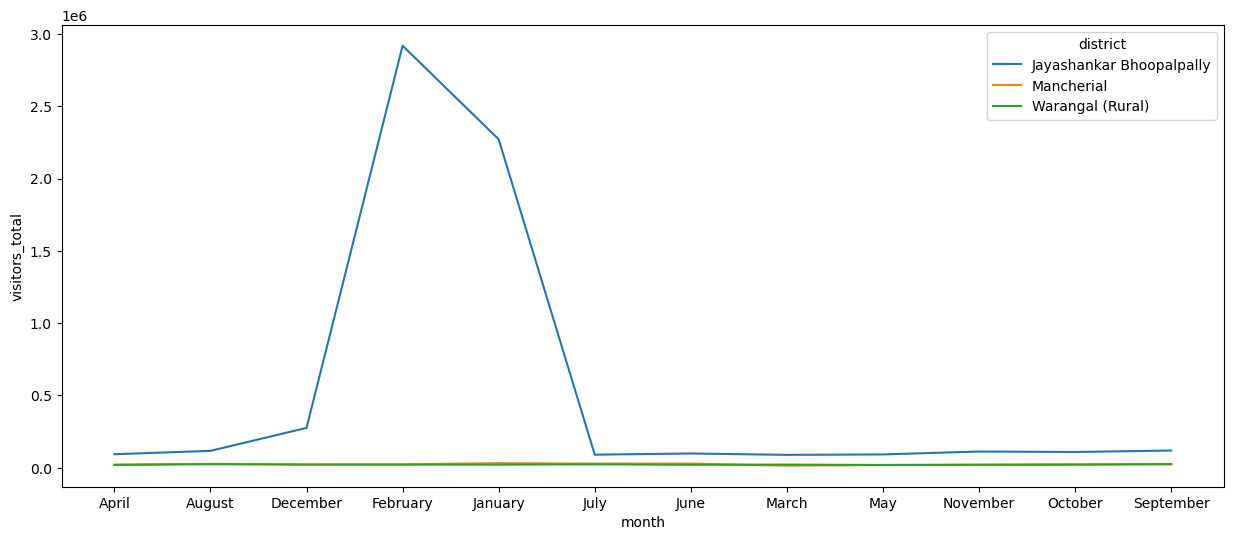

In [543]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.lineplot(data=pot_bymonth, x='month', y='visitors_total', hue='district')
#plt.xticks(rotation=50)
plt.show()

In [544]:
# we better focus on Jayashankar Bhoopalpally, and in winter: Feb,Jan,Dec

In [453]:
final.groupby('district').sum().sort_values('visitors_total',ascending=False)

,year,visitors_d,visitors_f,visitors_total,fd_ratio
district,,,,,
Hyderabad,96840,83900960,1044898,84945858,0.744649
Rajanna Sircilla,78696,41763276,0,41763276,0.000000
Warangal (Urban),96840,30726603,8821,30735424,0.056015
Yadadri Bhongir,78696,26893080,0,26893080,0.000000
Bhadradri Kothagudem,78696,21600962,0,21600962,0.000000
Medak,96840,20542639,0,20542639,0.000000
Jayashankar Bhoopalpally,78696,19632865,1252,19634117,0.009140
Mahbubnagar,96840,17180118,2282,17182400,0.008824
Nirmal,76679,12975437,2,12975439,0.000006


In [454]:
final.groupby('district').sum().sort_values('visitors_f',ascending=False)

,year,visitors_d,visitors_f,visitors_total,fd_ratio
district,,,,,
Hyderabad,96840,83900960,1044898,84945858,0.744649
Warangal (Urban),96840,30726603,8821,30735424,0.056015
Mahbubnagar,96840,17180118,2282,17182400,0.008824
Jayashankar Bhoopalpally,78696,19632865,1252,19634117,0.009140
Jogulamba Gadwal,78696,6813340,945,6814285,0.006662
Nagarkurnool,78696,7424355,761,7425116,0.004497
Mulugu,24228,1819800,575,1820375,0.003453
Warangal (Rural),78696,819162,306,819468,0.027781
Adilabad,96840,7321575,32,7321607,0.000426


In [456]:
visit_by_district = final.groupby('district').sum()

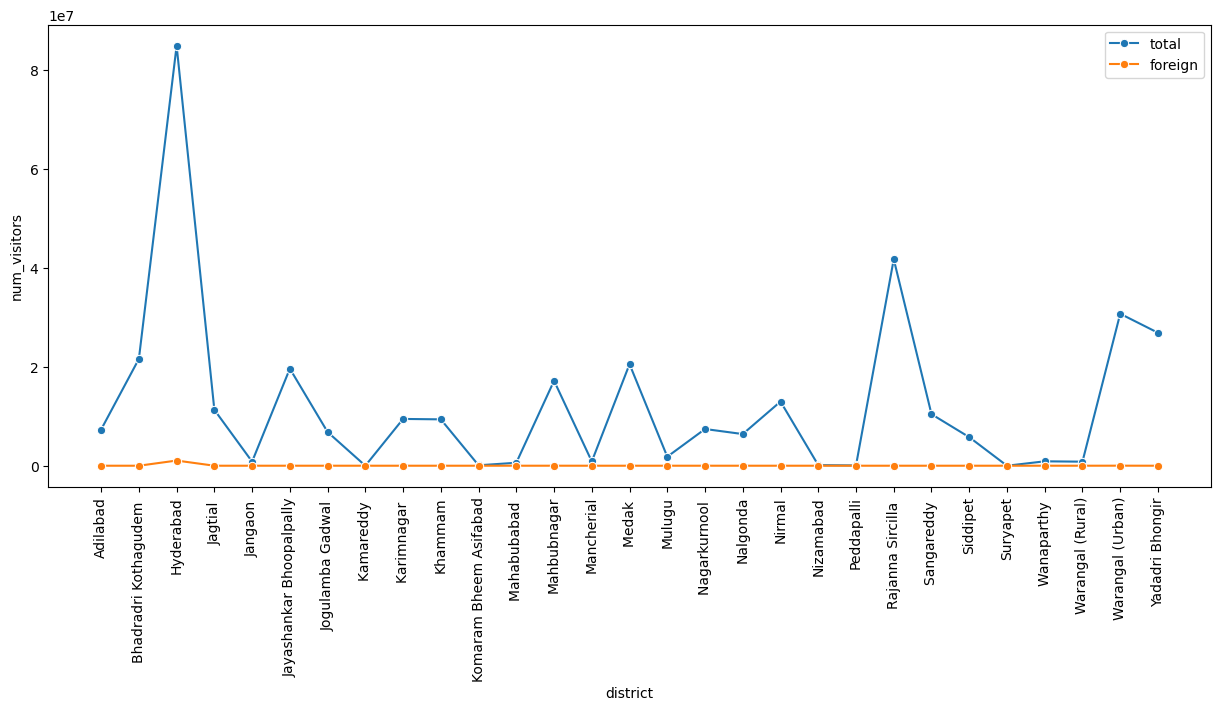

In [503]:
plt.figure(figsize=(15,6))
total_v=sns.lineplot(data=visit_by_district, x='district', y='visitors_total', style=True ,markers='o',label='total',legend=False)
foreign_v=sns.lineplot(data=visit_by_district, x='district', y='visitors_f',style=True ,markers='o',label= 'foreign',legend=False)
plt.legend()
plt.ylabel('num_visitors')
plt.xticks(rotation=90)
plt.show()

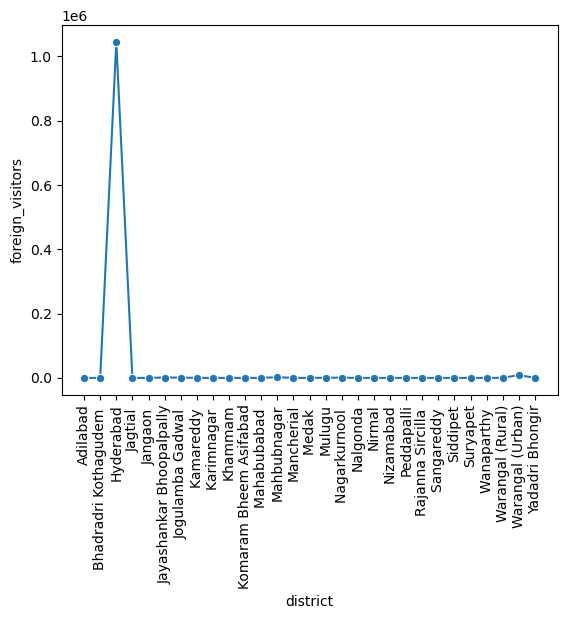

In [502]:
sns.lineplot(data=visit_by_district, x='district', y='visitors_f',style=True ,markers='o',legend=False)
plt.xticks(rotation=90)
plt.ylabel('foreign_visitors')
plt.show()

In [501]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)